In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE, RESOURCE_DIR


In [2]:
df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

,PROJECTS,COMMITS,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Combining the heuristics of Multimodel DBs (Ignite, MarkLogic and Virtuoso)

In [3]:
df["Join_Ignite-Sql"] = df["Ignite"] +  df["Ignite-Sql"]
df["Join_Ignite-NoSql"] = df["Ignite"] +  df["Ignite-NoSql"]
df["Join_MarkLogic-Sql"] = df["MarkLogic"] +  df["MarkLogic-Sql"]
df["Join_MarkLogic-NoSql"] = df["MarkLogic"] +  df["MarkLogic-NoSql"]
df["Join_Virtuoso-Sql"] = df["Virtuoso"] +  df["Virtuoso-Sql"]
df["Join_Virtuoso-NoSql"] = df["Virtuoso"] +  df["Virtuoso-NoSql"]
df

,PROJECTS,COMMITS,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3266,maxwell,7,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3267,maxwell,8,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3268,maxwell,9,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Deleting the heuristics of the Bd Multimodels that were alone 

In [4]:
df2 = df
df2.drop(["Ignite", "Ignite-Sql","Ignite-NoSql","MarkLogic","MarkLogic-Sql","MarkLogic-NoSql",
"Virtuoso","Virtuoso-Sql","Virtuoso-NoSql"], axis=1, inplace=True)
df2

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3266,maxwell,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3267,maxwell,8,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3268,maxwell,9,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Renaming the Multimodel DB heuristics 

In [5]:
df2['Join_Ignite-Sql']= df2['Join_Ignite-Sql'].replace([2,1],[1,0])
df2['Join_Ignite-NoSql']= df2['Join_Ignite-NoSql'].replace([2,1],[1,0])
df2['Join_MarkLogic-Sql']= df2['Join_MarkLogic-Sql'].replace([2,1],[1,0])
df2['Join_MarkLogic-NoSql']= df2['Join_MarkLogic-NoSql'].replace([2,1],[1,0])
df2['Join_Virtuoso-Sql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2['Join_Virtuoso-NoSql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3266,maxwell,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3267,maxwell,8,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3268,maxwell,9,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Generating the file with all the BD heuristics including the Multimodel BD combinations 

In [6]:
HISTORICAL_FILE_JOIN = RESOURCE_DIR + os.sep + 'historical_join.xlsx'
df.to_excel(HISTORICAL_FILE_JOIN, index=False) 
#df2 = df2.to_excel("historical_join.xlsx", index=False)

In [6]:
df

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3266,maxwell,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3267,maxwell,8,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3268,maxwell,9,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Number of commits that showed evidence of use by database

In [7]:
#df
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            822
PostgreSQL                       501
H2                               490
Oracle                           399
Ehcache                          357
Redis                            317
SQLite                           222
MongoDB                          214
MS SQL Server                    211
MariaDB                          204
IBM DB2                          164
Elasticsearch                    159
Google Cloud Datastore           132
SAP Adaptive Server              110
HBase                            109
Cassandra                         99
Hive                              85
DynamoDB                          83
Solr                              78
Hazelcast                         78
Firebase Realtime                 75
MS Access                         62
Informix                          61
Memcached                         60
Firebird                          53
SapHana                           44
PostGIS                           41
A

In [9]:

df2 = df.groupby("PROJECTS").sum()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df3 = df2.iloc[: , 1:]
df3.T

PROJECTS,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Memcached,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Riak KV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
Redis,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,8,0,0,0
Aerospike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google Cloud Datastore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,10,0,0,0
MariaDB,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7,7,0,0
Neo4j,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


Number of Projects in which there was evidence of use by Database 

In [10]:
def num_missing(x):
   return sum(x >= 1)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#without COMMITS
df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)

MySQL                            110
H2                                76
PostgreSQL                        75
Oracle                            65
Redis                             64
Ehcache                           57
MariaDB                           43
MongoDB                           38
SQLite                            37
MS SQL Server                     36
Elasticsearch                     26
IBM DB2                           24
Google Cloud Datastore            22
Hazelcast                         20
HBase                             19
Cassandra                         18
DynamoDB                          17
SAP Adaptive Server               17
Firebase Realtime                 16
Solr                              15
Hive                              11
Firebird                           9
Google BigQuery                    9
Informix                           9
Memcached                          8
MS Access                          8
PostGIS                            7
C

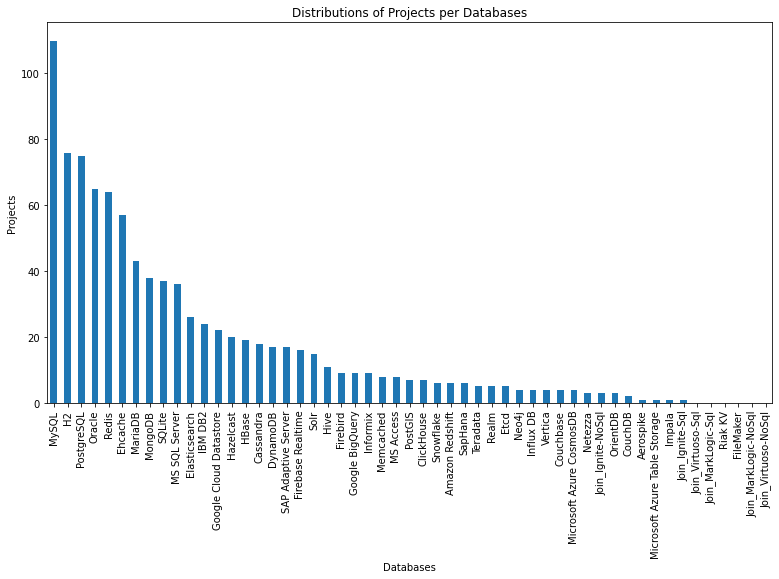

In [15]:
plt.figure(figsize=(13,7))
df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases')
plt.xlabel("Databases")
plt.ylabel("Projects")
plt.show() 

Number of Projects in which there was indication of use in all versions of the project by Database

In [12]:
def full_commits(x):
   return sum(x == 10)
df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False)

MySQL                            41
PostgreSQL                       21
H2                               19
Oracle                           18
Ehcache                          16
IBM DB2                           7
SQLite                            7
Redis                             6
Google Cloud Datastore            6
Hive                              4
MongoDB                           4
MS Access                         4
Informix                          3
Teradata                          3
Firebird                          3
SAP Adaptive Server               3
MS SQL Server                     3
Netezza                           2
Hazelcast                         2
Firebase Realtime                 2
Memcached                         2
SapHana                           2
Snowflake                         1
Solr                              1
Google BigQuery                   1
HBase                             1
MariaDB                           1
Vertica                     

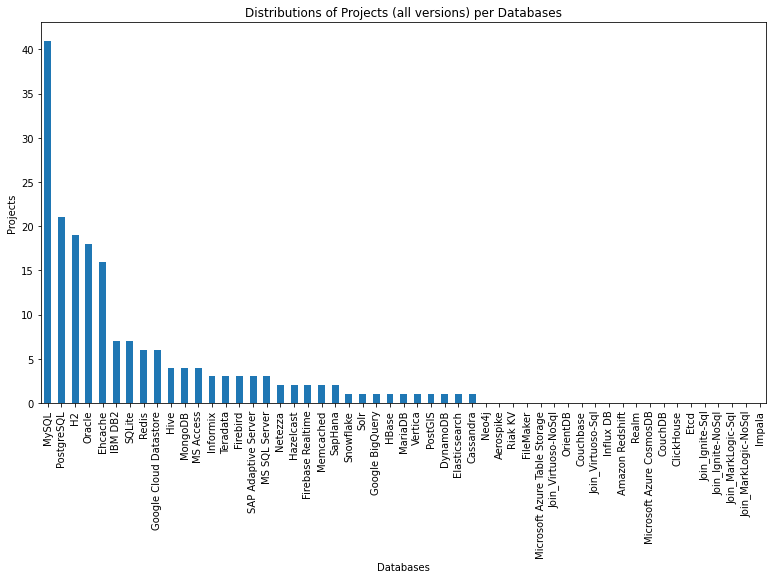

In [14]:
plt.figure(figsize=(13,7))
df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects (all versions) per Databases')
plt.xlabel("Databases")
plt.ylabel("Projects")
plt.show() 

Number of Projects in which there was an indication of use in some of the versions of projects by Database

In [16]:
def less_commits(x):
   #return sum(x/10)
   return sum(x % 10 != 0 )
df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False)

MySQL                            69
Redis                            58
H2                               57
PostgreSQL                       54
Oracle                           47
MariaDB                          42
Ehcache                          41
MongoDB                          34
MS SQL Server                    33
SQLite                           30
Elasticsearch                    25
Hazelcast                        18
HBase                            18
IBM DB2                          17
Cassandra                        17
DynamoDB                         16
Google Cloud Datastore           16
SAP Adaptive Server              14
Solr                             14
Firebase Realtime                14
Google BigQuery                   8
ClickHouse                        7
Hive                              7
Firebird                          6
Informix                          6
Amazon Redshift                   6
PostGIS                           6
Memcached                   

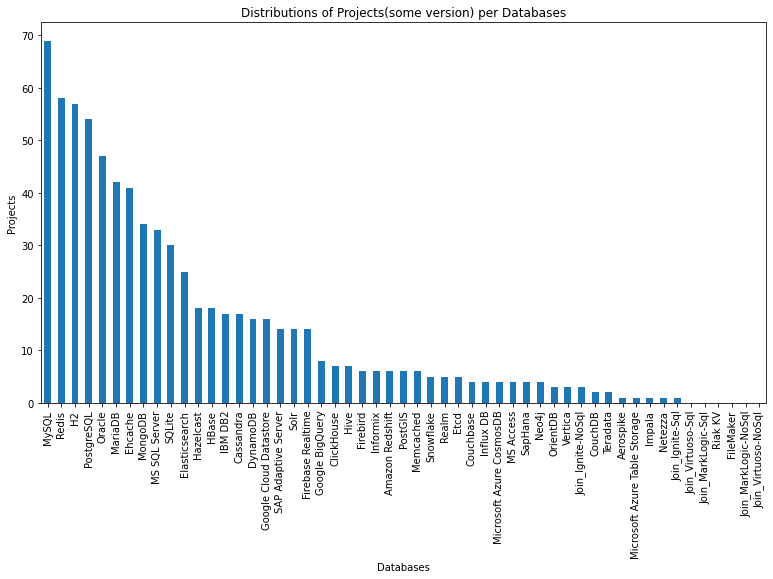

In [17]:
plt.figure(figsize=(13,7))
df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects(some version) per Databases')
plt.xlabel("Databases")
plt.ylabel("Projects")
plt.show() 